This notebook shows timeseries of reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed). 

This notebook was created by Thea Hatlen Heimdal, in collaboration with Abby Shaum Julius Busecke. 

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt

In [2]:
# List of all LET members

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle" #without MPI

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

## Bring in reconstructions and testbed truth

### SOCAT baseline

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Historical + SOCAT

### Baseline

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

## Optimized

### Baseline

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Calculate bias

#### Globally

In [10]:
timeline_SOCAT = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_baseline = ds_500_historical_baseline.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_bias = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_uncertainty = ds_500_historical_uncertainty.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

timeline_500_optimized_baseline = ds_500_optimized_baseline.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_bias = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_uncertainty = ds_500_optimized_uncertainty.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

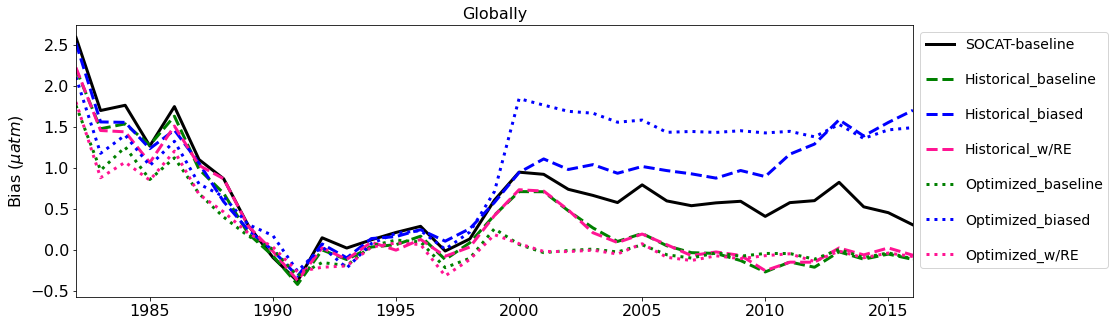

In [11]:
fig = plt.figure(figsize=(15,5))

plt.plot(timeline_SOCAT.year, timeline_SOCAT, label='SOCAT-baseline', color='black', linewidth=3.0)

plt.plot(timeline_500_historical_baseline.year, timeline_500_historical_baseline, label='Historical_baseline', linewidth=3.0, color='green', linestyle='--')
plt.plot(timeline_500_historical_bias.year, timeline_500_historical_bias, label='Historical_biased', linestyle='--', linewidth=3.0, color='blue')
plt.plot(timeline_500_historical_uncertainty.year, timeline_500_historical_uncertainty, label='Historical_w/RE', linestyle='--', linewidth=3.0, color='deeppink')

plt.plot(timeline_500_optimized_baseline.year, timeline_500_optimized_baseline, label='Optimized_baseline', color='green', linewidth=3.0, linestyle='dotted')
plt.plot(timeline_500_optimized_bias.year, timeline_500_optimized_bias, label='Optimized_biased', linewidth=3.0, color='blue', linestyle='dotted')
plt.plot(timeline_500_optimized_uncertainty.year, timeline_500_optimized_uncertainty, label='Optimized_w/RE', linewidth=3.0, color='deeppink', linestyle='dotted')

plt.title('Globally', fontsize=16)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);


fig.savefig("/home/theimdal/timeline_bias.jpg",dpi=300, bbox_inches="tight")

### With 1 IQR

In [11]:
timeline_SOCAT_IQR = ds_SOCAT_only.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])

timeline_historical_baseline_IQR = ds_500_historical_baseline.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])
timeline_historical_bias_IQR = ds_500_historical_bias.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])
timeline_historical_uncertainty_IQR = ds_500_historical_uncertainty.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])

timeline_optimized_baseline_IQR = ds_500_optimized_baseline.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])
timeline_optimized_bias_IQR = ds_500_optimized_bias.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])
timeline_optimized_uncertainty_IQR = ds_500_optimized_uncertainty.diff('status').sel(time=slice('1982','2016')).groupby("time.year").mean(['status', 'ylat', 'xlon', 'time'])

In [17]:
SOCAT_IQR = timeline_SOCAT_IQR.to_dataframe()

historical_baseline_IQR = timeline_historical_baseline_IQR.to_dataframe()
historical_bias_IQR = timeline_historical_bias_IQR.to_dataframe()
historical_uncertainty_IQR = timeline_historical_uncertainty_IQR.to_dataframe()

optimized_baseline_IQR = timeline_optimized_baseline_IQR.to_dataframe()
optimized_bias_IQR = timeline_optimized_bias_IQR.to_dataframe()
optimized_uncertainty_IQR = timeline_optimized_uncertainty_IQR.to_dataframe()

In [18]:
SOCAT_stats = SOCAT_IQR.groupby(['year']).describe()

historical_baseline_stats = historical_baseline_IQR.groupby(['year']).describe()
historical_bias_stats = historical_bias_IQR.groupby(['year']).describe()
historical_uncertainty_stats = historical_uncertainty_IQR.groupby(['year']).describe()

optimized_baseline_stats = optimized_baseline_IQR.groupby(['year']).describe()
optimized_bias_stats = optimized_bias_IQR.groupby(['year']).describe()
optimized_uncertainty_stats = optimized_uncertainty_IQR.groupby(['year']).describe()

In [19]:
SOCAT_stats_xr = SOCAT_stats.to_xarray()

historical_baseline_stats_xr = historical_baseline_stats.to_xarray()
historical_bias_stats_xr = historical_bias_stats.to_xarray()
historical_uncertainty_stats_xr = historical_uncertainty_stats.to_xarray()

optimized_baseline_stats_xr = optimized_baseline_stats.to_xarray()
optimized_bias_stats_xr = optimized_bias_stats.to_xarray()
optimized_uncertainty_stats_xr = optimized_uncertainty_stats.to_xarray()

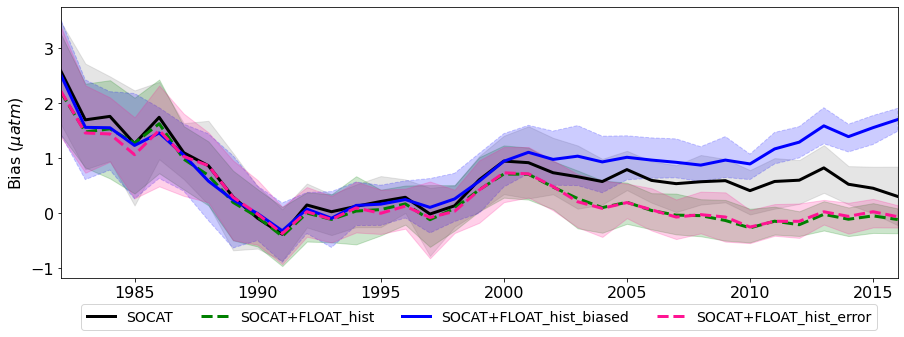

In [20]:
fig = plt.figure(figsize=(15,5))

plt.plot(SOCAT_stats_xr.year, SOCAT_stats_xr[('pCO2', 'mean')], label='SOCAT', color='black', linewidth=3.0)
plt.fill_between(SOCAT_stats_xr.year, SOCAT_stats_xr[('pCO2', '25%')], SOCAT_stats_xr[('pCO2', '75%')], alpha=0.2, color = 'gray')

plt.plot(historical_baseline_stats_xr.year, historical_baseline_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_hist', color='green', linewidth=3.0, linestyle='--')
plt.fill_between(historical_baseline_stats_xr.year, historical_baseline_stats_xr[('pCO2', '25%')], historical_baseline_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'green')

plt.plot(historical_bias_stats_xr.year, historical_bias_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_hist_biased', color='blue', linewidth=3.0)
plt.fill_between(historical_bias_stats_xr.year, historical_bias_stats_xr[('pCO2', '25%')], historical_bias_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'blue', linestyle='--')

plt.plot(historical_uncertainty_stats_xr.year, historical_uncertainty_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_hist_error', color='deeppink', linewidth=3.0, linestyle='--')
plt.fill_between(historical_uncertainty_stats_xr.year, historical_uncertainty_stats_xr[('pCO2', '25%')], historical_uncertainty_stats_xr[('pCO2', '75%')], alpha=0.2, color = 'deeppink')


# plt.plot(optimized_baseline_stats_xr.year, optimized_baseline_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_opt', color='green', linewidth=3.0, linestyle='dotted')
# plt.fill_between(optimized_baseline_stats_xr.year, optimized_baseline_stats_xr[('pCO2', '25%')], optimized_baseline_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'green')

# plt.plot(optimized_bias_stats_xr.year, optimized_bias_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_opt_biased', color='blue', linewidth=3.0, linestyle='dotted')
# plt.fill_between(optimized_bias_stats_xr.year, optimized_bias_stats_xr[('pCO2', '25%')], optimized_bias_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'blue')

# plt.plot(optimized_uncertainty_stats_xr.year, optimized_uncertainty_stats_xr[('pCO2', 'mean')], label='SOCAT+FLOAT_opt_error', color='deeppink', linewidth=3.0, linestyle='dotted')
# plt.fill_between(optimized_uncertainty_stats_xr.year, optimized_uncertainty_stats_xr[('pCO2', '25%')], optimized_uncertainty_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'deeppink')



#plt.title('Optimized (globally)', fontsize=16)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=4, fontsize=14);


#fig.savefig("/home/theimdal/timeline_bias_globally_optimized_IQR.jpg",dpi=300, bbox_inches="tight")

### Other latitude bands

In [15]:
#timeline_SOCAT_north = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(0,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_bias_north = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(0,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_bias_north = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(0,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

#timeline_SOCAT_south = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-90,-35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_bias_south = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-90,-35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_bias_south = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-90,-35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

#timeline_SOCAT_north2 = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_bias_north2 = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_bias_north2 = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,90)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

#timeline_SOCAT_mid = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_optimized_bias_mid = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])
timeline_500_historical_bias_mid = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31"), ylat=slice(-35,35)).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'ylat', 'xlon','status'])

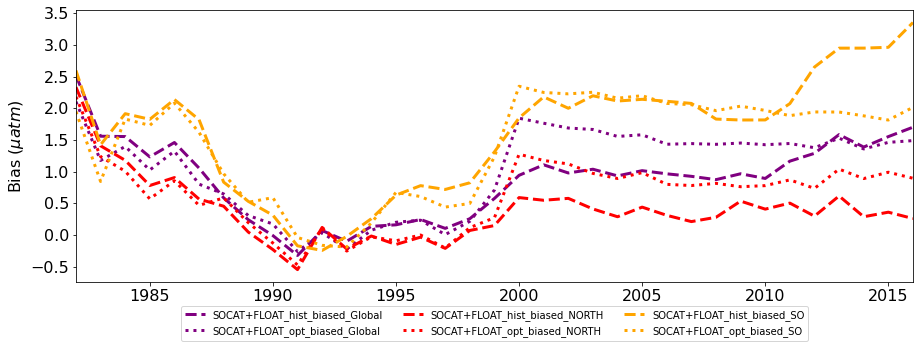

In [17]:
fig = plt.figure(figsize=(15,5))

plt.plot(timeline_500_historical_bias.year, timeline_500_historical_bias, label='SOCAT+FLOAT_hist_biased_Global', linestyle='--', linewidth=3.0, color='purple')
plt.plot(timeline_500_optimized_bias.year, timeline_500_optimized_bias, label='SOCAT+FLOAT_opt_biased_Global', linewidth=3.0, color='purple', linestyle='dotted')

plt.plot(timeline_500_historical_bias_north.year, timeline_500_historical_bias_north, label='SOCAT+FLOAT_hist_biased_NORTH', linestyle='--', linewidth=3.0, color='red')
plt.plot(timeline_500_optimized_bias_north.year, timeline_500_optimized_bias_north, label='SOCAT+FLOAT_opt_biased_NORTH', linewidth=3.0, color='red', linestyle='dotted')

plt.plot(timeline_500_historical_bias_south.year, timeline_500_historical_bias_south, label='SOCAT+FLOAT_hist_biased_SO', linestyle='--', linewidth=3.0, color='orange')
plt.plot(timeline_500_optimized_bias_south.year, timeline_500_optimized_bias_south, label='SOCAT+FLOAT_opt_biased_SO', linewidth=3.0, color='orange', linestyle='dotted')

#plt.plot(timeline_SOCAT_north.year, timeline_SOCAT_north, label='SOCAT-baseline_NORTH', linewidth=3.0, color='black')


#plt.title('Various latitude bands', fontsize=16)
plt.ylabel('Bias ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=3);


#fig.savefig("/home/theimdal/timeline_bias_lat_bands.jpg",dpi=300, bbox_inches="tight")

### Calculate RMSE

### Globally

In [12]:
RMSE_timeline_SOCAT = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_historical_baseline = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_bias = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_uncertainty = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_optimized_baseline = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_bias = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_uncertainty = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

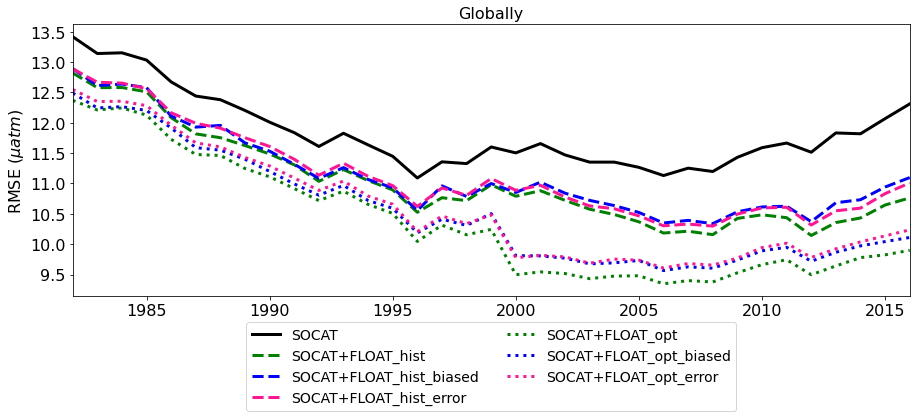

In [17]:
fig = plt.figure(figsize=(15,5))

plt.plot(RMSE_timeline_SOCAT.year, RMSE_timeline_SOCAT, label='SOCAT', color='black', linewidth=3.0)

plt.plot(RMSE_timeline_500_historical_baseline.year, RMSE_timeline_500_historical_baseline, label='SOCAT+FLOAT_hist', color='green', linestyle='--', linewidth=3.0)
plt.plot(RMSE_timeline_500_historical_bias.year, RMSE_timeline_500_historical_bias, label='SOCAT+FLOAT_hist_biased', linestyle='--', color='blue', linewidth=3.0)
plt.plot(RMSE_timeline_500_historical_uncertainty.year, RMSE_timeline_500_historical_uncertainty, label='SOCAT+FLOAT_hist_error', color='deeppink',linestyle='--', linewidth=3.0)

plt.plot(RMSE_timeline_500_optimized_baseline.year, RMSE_timeline_500_optimized_baseline, label='SOCAT+FLOAT_opt', color='green', linestyle='dotted', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_bias.year, RMSE_timeline_500_optimized_bias, label='SOCAT+FLOAT_opt_biased', linestyle='dotted', color='blue', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_uncertainty.year, RMSE_timeline_500_optimized_uncertainty, label='SOCAT+FLOAT_opt_error', linestyle='dotted', color='deeppink', linewidth=3.0)


plt.title('Globally', fontsize=16)
plt.ylabel('RMSE ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=2, fontsize=14);

#fig.savefig("/home/theimdal/timeline_RMSE.jpg",dpi=300, bbox_inches="tight")

### With 1 IQR

In [10]:
RMSE_timeline_SOCAT_IQR = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))

RMSE_timeline_historical_baseline_IQR = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))
RMSE_timeline_historical_bias_IQR = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))
RMSE_timeline_historical_uncertainty_IQR = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))

RMSE_timeline_optimized_baseline_IQR = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))
RMSE_timeline_optimized_bias_IQR = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))
RMSE_timeline_optimized_uncertainty_IQR = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016')).groupby("time.year").mean(['status', 'time', 'xlon', 'ylat']))

In [11]:
RMSE_SOCAT_IQR = RMSE_timeline_SOCAT_IQR.to_dataframe()

RMSE_historical_baseline_IQR = RMSE_timeline_historical_baseline_IQR.to_dataframe()
RMSE_historical_bias_IQR = RMSE_timeline_historical_bias_IQR.to_dataframe()
RMSE_historical_uncertainty_IQR = RMSE_timeline_historical_uncertainty_IQR.to_dataframe()

RMSE_optimized_baseline_IQR = RMSE_timeline_optimized_baseline_IQR.to_dataframe()
RMSE_optimized_bias_IQR = RMSE_timeline_optimized_bias_IQR.to_dataframe()
RMSE_optimized_uncertainty_IQR = RMSE_timeline_optimized_uncertainty_IQR.to_dataframe()

In [12]:
RMSE_SOCAT_stats = RMSE_SOCAT_IQR.groupby(['year']).describe()

RMSE_historical_baseline_stats = RMSE_historical_baseline_IQR.groupby(['year']).describe()
RMSE_historical_bias_stats = RMSE_historical_bias_IQR.groupby(['year']).describe()
RMSE_historical_uncertainty_stats = RMSE_historical_uncertainty_IQR.groupby(['year']).describe()

RMSE_optimized_baseline_stats = RMSE_optimized_baseline_IQR.groupby(['year']).describe()
RMSE_optimized_bias_stats = RMSE_optimized_bias_IQR.groupby(['year']).describe()
RMSE_optimized_uncertainty_stats = RMSE_optimized_uncertainty_IQR.groupby(['year']).describe()

In [13]:
RMSE_SOCAT_stats_xr = RMSE_SOCAT_stats.to_xarray()

RMSE_historical_baseline_stats_xr = RMSE_historical_baseline_stats.to_xarray()
RMSE_historical_bias_stats_xr = RMSE_historical_bias_stats.to_xarray()
RMSE_historical_uncertainty_stats_xr = RMSE_historical_uncertainty_stats.to_xarray()

RMSE_optimized_baseline_stats_xr = RMSE_optimized_baseline_stats.to_xarray()
RMSE_optimized_bias_stats_xr = RMSE_optimized_bias_stats.to_xarray()
RMSE_optimized_uncertainty_stats_xr = RMSE_optimized_uncertainty_stats.to_xarray()

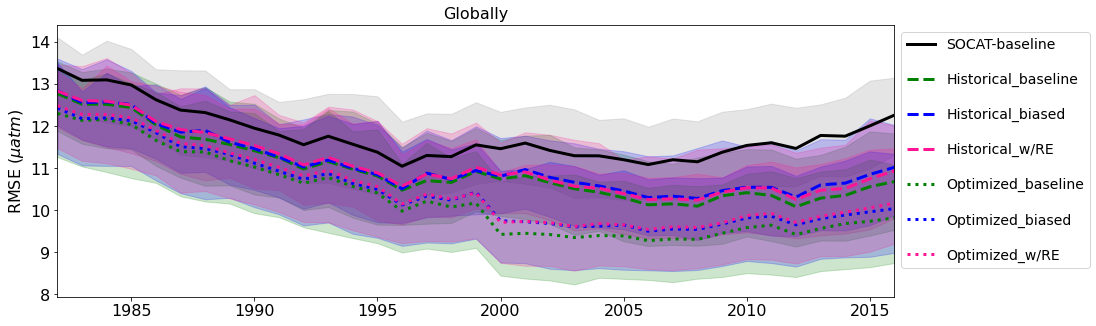

In [14]:
fig = plt.figure(figsize=(15,5))

plt.plot(RMSE_SOCAT_stats_xr.year, RMSE_SOCAT_stats_xr[('pCO2', 'mean')], label='SOCAT-baseline', color='black', linewidth=3.0)
plt.fill_between(RMSE_SOCAT_stats_xr.year, RMSE_SOCAT_stats_xr[('pCO2', '25%')], RMSE_SOCAT_stats_xr[('pCO2', '75%')], alpha=0.2, color = 'gray')

plt.plot(RMSE_historical_baseline_stats_xr.year, RMSE_historical_baseline_stats_xr[('pCO2', 'mean')], label='Historical_baseline', color='green', linewidth=3.0, linestyle='--')
plt.fill_between(RMSE_historical_baseline_stats_xr.year, RMSE_historical_baseline_stats_xr[('pCO2', '25%')], RMSE_historical_baseline_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'green')

plt.plot(RMSE_historical_bias_stats_xr.year, RMSE_historical_bias_stats_xr[('pCO2', 'mean')], label='Historical_biased', color='blue', linewidth=3.0, linestyle='--')
plt.fill_between(RMSE_historical_bias_stats_xr.year, RMSE_historical_bias_stats_xr[('pCO2', '25%')], RMSE_historical_bias_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'blue')

plt.plot(RMSE_historical_uncertainty_stats_xr.year, RMSE_historical_uncertainty_stats_xr[('pCO2', 'mean')], label='Historical_w/RE', color='deeppink', linewidth=3.0, linestyle='--')
plt.fill_between(RMSE_historical_uncertainty_stats_xr.year, RMSE_historical_uncertainty_stats_xr[('pCO2', '25%')], RMSE_historical_uncertainty_stats_xr[('pCO2', '75%')], alpha=0.2, color = 'deeppink')


plt.plot(RMSE_optimized_baseline_stats_xr.year, RMSE_optimized_baseline_stats_xr[('pCO2', 'mean')], label='Optimized_baseline', color='green', linewidth=3.0, linestyle='dotted')
plt.fill_between(RMSE_optimized_baseline_stats_xr.year, RMSE_optimized_baseline_stats_xr[('pCO2', '25%')], RMSE_optimized_baseline_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'green')

plt.plot(RMSE_optimized_bias_stats_xr.year, RMSE_optimized_bias_stats_xr[('pCO2', 'mean')], label='Optimized_biased', color='blue', linewidth=3.0, linestyle='dotted')
plt.fill_between(RMSE_optimized_bias_stats_xr.year, RMSE_optimized_bias_stats_xr[('pCO2', '25%')], RMSE_optimized_bias_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'blue')

plt.plot(RMSE_optimized_uncertainty_stats_xr.year, RMSE_optimized_uncertainty_stats_xr[('pCO2', 'mean')], label='Optimized_w/RE', color='deeppink', linewidth=3.0, linestyle='dotted')
plt.fill_between(RMSE_optimized_uncertainty_stats_xr.year, RMSE_optimized_uncertainty_stats_xr[('pCO2', '25%')], RMSE_optimized_uncertainty_stats_xr[('pCO2', '75%')], alpha=0.2,  color = 'deeppink')



plt.title('Globally', fontsize=16)
plt.ylabel('RMSE ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);


#fig.savefig("/home/theimdal/timeline_RMSE_globally_IQR_75mem.jpg",dpi=300, bbox_inches="tight")

### Other latitude bands

In [10]:
ylat_slice = slice(-90,-35)

RMSE_timeline_SOCAT_SO = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_historical_baseline_SO  = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_bias_SO  = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_uncertainty_SO  = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_optimized_baseline_SO  = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_bias_SO  = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_uncertainty_SO  = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

In [11]:
ylat_slice = slice(-35,90)

RMSE_timeline_SOCAT_north = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_historical_baseline_north  = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_bias_north  = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_historical_uncertainty_north  = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

RMSE_timeline_500_optimized_baseline_north  = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_bias_north  = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_500_optimized_uncertainty_north  = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice('1982', '2016'), ylat=ylat_slice).groupby("time.year").mean(['n_member', 'ensemble', 'status', 'time', 'xlon', 'ylat']))

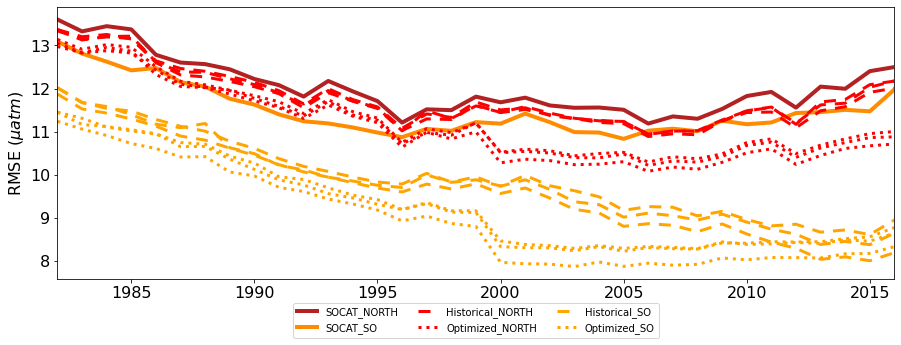

In [14]:
fig = plt.figure(figsize=(15,5))

plt.plot(RMSE_timeline_SOCAT_north.year, RMSE_timeline_SOCAT_north, label='SOCAT_NORTH', color='firebrick', linestyle='solid', linewidth=4.0)
plt.plot(RMSE_timeline_SOCAT_SO.year, RMSE_timeline_SOCAT_SO, label='SOCAT_SO', linestyle='solid', color='darkorange', linewidth=4.0)

plt.plot(RMSE_timeline_500_historical_baseline_north.year, RMSE_timeline_500_historical_baseline_north, label='Historical_NORTH', color='red', linestyle='--', linewidth=3.0, dashes=(4, 3))
plt.plot(RMSE_timeline_500_historical_bias_north.year, RMSE_timeline_500_historical_bias_north, label='', linestyle='--', color='red', linewidth=3.0, dashes=(4, 3))
plt.plot(RMSE_timeline_500_historical_uncertainty_north.year, RMSE_timeline_500_historical_uncertainty_north, label='', color='red',linestyle='--', linewidth=3.0, dashes=(4, 3))

plt.plot(RMSE_timeline_500_optimized_baseline_north.year, RMSE_timeline_500_optimized_baseline_north, label='Optimized_NORTH', color='red', linestyle='dotted', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_bias_north.year, RMSE_timeline_500_optimized_bias_north, label='', linestyle='dotted', color='red', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_uncertainty_north.year, RMSE_timeline_500_optimized_uncertainty_north, label='', linestyle='dotted', color='red', linewidth=3.0)

plt.plot(RMSE_timeline_500_historical_baseline_SO.year, RMSE_timeline_500_historical_baseline_SO, label='Historical_SO', color='orange', linestyle='--', linewidth=3.0, dashes=(4, 3))
plt.plot(RMSE_timeline_500_historical_bias_SO.year, RMSE_timeline_500_historical_bias_SO, label='', linestyle='--', color='orange', linewidth=3.0, dashes=(4, 3))
plt.plot(RMSE_timeline_500_historical_uncertainty_SO.year, RMSE_timeline_500_historical_uncertainty_SO, label='', color='orange',linestyle='--', linewidth=3.0, dashes=(4, 3))

plt.plot(RMSE_timeline_500_optimized_baseline_SO.year, RMSE_timeline_500_optimized_baseline_SO, label='Optimized_SO', color='orange', linestyle='dotted', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_bias_SO.year, RMSE_timeline_500_optimized_bias_SO, label='', linestyle='dotted', color='orange', linewidth=3.0)
plt.plot(RMSE_timeline_500_optimized_uncertainty_SO.year, RMSE_timeline_500_optimized_uncertainty_SO, label='', linestyle='dotted', color='orange', linewidth=3.0)

#plt.title('North of equator', fontsize=16)
plt.ylabel('RMSE ($\mu atm$)', fontsize=16)
plt.xlim(1982,2016)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
#plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', labelspacing=1.5, fontsize=14);

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=3);

#fig.savefig("/home/theimdal/timeline_RMSE_lat_bands.jpg",dpi=300, bbox_inches="tight")